In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#Acme Insurance Company sells auto insurance directly to consumers via Vertical Search websites. 
#On these websites, consumers who are already shopping for auto insurance enter some information about themselves and 
#then are shown ads from insurance companies. Each ad shown is called an "impression" and each record in this table 
#represents one ad impression.

# These ads are shown based on an online auction where insurance companies bid to have their ad shown, 
# and the ads are shown in order based on the highest bid amount. The insurance companies only pay if 
# their ad is clicked on, but bidding higher will cause the ad to be shown higher in the ranking and is 
# more likely to be clicked on if it is in a higher position.

# Acme currently bids $10 for all customers, but is able to set different bid prices for different types of customers.
# For example, Acme could bid $10 for all customers with 1 vehicle and $12 for all customers with 2 vehicles. 

# Acme would like to come up with a bidding strategy which optimizes the cost per customer acquired while ensuring
# that for every 10,000 ads shown they are expected to acquire at least 400 customers. How should Acme set prices by 
# customers segment?
# The channel manager who buys advertising on this vertical search website would also like to know if in
# the course of your analysis you come across any other interesting findings!


In [27]:
Acme=pd.read_csv("Acme.csv")
Acme.policies_sold[Acme['policies_sold']== " -   "]=0
Acme.policies_sold[Acme['policies_sold']== " 1 "]=1
Acme.marital_status[Acme['marital_status']== "S"]=0
Acme.marital_status[Acme['marital_status']== "M"]=1
Acme.currently_insured[Acme['currently_insured']== "N"]=0
Acme.currently_insured[Acme['currently_insured']== "Y"]=1
Acme['clicked']=0
Acme.clicked[Acme[' clicked_ad ']== " 1 "]=1
Acme=Acme.drop(columns=[' clicked_ad ']);
# Acme['policy_sold']=0
# Acme.policy_sold[Acme['policies_sold']== " 1 "]=1
# Acme=Acme.drop(columns=['policies_sold']);


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Dell\Anaconda3\lib\site

In [28]:
x=np.array([0,1])
lst=np.array(np.meshgrid(x, x, x, x)).T.reshape(-1,4)
lst[:,1:3]=lst[:,1:3]+1
Perc_by_rank=np.zeros([16,5,5])

for j in range(16):
    for i in range(5):
        df=Acme[(Acme.iloc[:,2]==lst[j,0])&(Acme.iloc[:,3]==lst[j,1])&(Acme.iloc[:,4]==lst[j,2])&(Acme.iloc[:,5]==lst[j,3])]
        Perc_by_rank[j,i,4]=len(df)
        a=len(df[df.iloc[:,6]==i+1])
        Perc_by_rank[j,i,3]=a
        b=len(df[(df.iloc[:,6]==i+1)&(df.clicked==1)])
        c=len(df[(df.iloc[:,6]==i+1)&(df.policies_sold==1)])
        if b==0 & a==0:
            Perc_by_rank[j,i,0:3]=[0,0,0]
        else:
            if b==0:
                Perc_by_rank[j,i,0:3]=[c/a,b/a,0]
            else:
                Perc_by_rank[j,i,0:3]=[c/a,b/a,c/b]

In [29]:
#this is scratch work to find the pdf
sums=np.zeros(4)
for j in range(15):
    if Perc_by_rank[j,0,3]==0:
        if Perc_by_rank[j,1,3]>0:
            for i in range(4):
                sums[i]=sums[i]+Perc_by_rank[j,i+1,3]
    elif Perc_by_rank[j,3,3]>0:
        for i in range(4):
            sums[i]=sums[i]+Perc_by_rank[j,i,3]       
    
print(sums, sums[0]+sums[3],sums[1]+sums[2],sums[0]/sums[1],sums[3]/sums[2],(sums[0]+sums[3])/(sums[1]+sums[2]))

[ 816. 1181. 1246.  868.] 1684.0 2427.0 0.6909398814563928 0.6966292134831461 0.6938607334157396


In [30]:
# a center is the mean if there are 4 entries, and a modified mean to accound for no 6 or 0 position for 3 entries
centers=np.zeros(16)
for j in range(16):
    s=0
    if (Perc_by_rank[j,1,3]==0):
        s=4*sum(Perc_by_rank[j,2:4,3])+5*Perc_by_rank[j,4,3]
    elif (Perc_by_rank[j,3,3]==0):
        s=2*sum(Perc_by_rank[j,1:3,3])+Perc_by_rank[j,0,3]
    else:
        for i in range(5):
            s=s+Perc_by_rank[j,i,3]*(i+1)
    centers[j]=s/sum(Perc_by_rank[j,:,3])
print(centers)

[2.69230769 4.51351351 2.58974359 4.5483871  1.50439367 3.47107438
 2.53151618 3.53436807 2.52815013 4.50124193 2.50953678 4.50729572
 1.48932677 3.47597254 2.6043771  3.5913242 ]


In [31]:
means=np.zeros(16)
for j in range(16):
    s=0
    for i in range(5):
        s=s+Perc_by_rank[j,i,3]*(i+1)
    means[j]=s/sum(Perc_by_rank[j,:,3])
print(means)

[2.69230769 4.32432432 2.58974359 4.3655914  1.7029877  3.47107438
 2.53151618 3.53436807 2.52815013 4.31743666 2.50953678 4.31031128
 1.71428571 3.47597254 2.6043771  3.5913242 ]


In [32]:
from scipy.integrate import quad


In [33]:
#this is my grid optimization code for r

# err_mat=np.zeros(100)
# r_mat=np.linspace(1.82,1.84,100)
# for k in range(100):
#     r=r_mat[k]
#     pdf = lambda x,mu : ((r**4 - (x-mu)**4)**.25)/6.141436961093065
#     def prob (a,b,mu):
#         if (b < mu-r) or (a>mu+r):
#             ans=0
#         else:
#             ans=quad(pdf,np.max([a,mu-r]),np.min([b,mu+r]), args=(mu,))[0]
#         return ans

#     n_approx_prob_res=np.zeros([16,5])

#     for j in range(16):
#         for i in range(5):
#             if i==0:
#                 n_approx_prob_res[j,i]=Perc_by_rank[j,i,3]/Perc_by_rank[j,0,4]-prob(-2,i+1.5,centers[j])
#             elif i==4:
#                 n_approx_prob_res[j,i]=Perc_by_rank[j,i,3]/Perc_by_rank[j,0,4]-prob(i+.5,7,centers[j])
#             else:
#                 n_approx_prob_res[j,i]=Perc_by_rank[j,i,3]/Perc_by_rank[j,0,4]-prob(i+.5,i+1.5,centers[j])
#     err_mat[k]=np.linalg.norm(n_approx_prob_res)/20

In [34]:
# here I find the probability eerror

# r=r_mat[np.argmin(err_mat)]
r=1.8292929292929294

pdf = lambda x,mu : ((r**4 - (x-mu)**4)**.25)/6.141436961093065
def r4_prob (a,b,mu):
    if (b < mu-r) or (a>mu+r):
        ans=0
    else:
        ans=quad(pdf,np.max([a,mu-r]),np.min([b,mu+r]), args=(mu,))[0]
    return ans

n_approx_prob_res=np.zeros([16,5])

for j in range(16):
    for i in range(5):
        if i==0:
            n_approx_prob_res[j,i]=Perc_by_rank[j,i,3]/Perc_by_rank[j,0,4]-r4_prob(-2,i+1.5,centers[j])
        elif i==4:
            n_approx_prob_res[j,i]=Perc_by_rank[j,i,3]/Perc_by_rank[j,0,4]-r4_prob(i+.5,7,centers[j])
        else:
            n_approx_prob_res[j,i]=Perc_by_rank[j,i,3]/Perc_by_rank[j,0,4]-r4_prob(i+.5,i+1.5,centers[j])
np.linalg.norm(n_approx_prob_res)/20

0.013682558395717645

In [35]:
# here I find the numerical error

n_approx=np.zeros([16,5])
for j in range(16):
    for i in range(5):
        if i==0:
            n_approx[j,i]=Perc_by_rank[j,0,4]*r4_prob(-2,i+1.5,centers[j])
        elif i==4:
            n_approx[j,i]=Perc_by_rank[j,0,4]*r4_prob(i+.5,7,centers[j])
        else:
            n_approx[j,i]=Perc_by_rank[j,0,4]*r4_prob(i+.5,i+1.5,centers[j])
res=n_approx-Perc_by_rank[:,:,3]
np.linalg.norm(res)/20

4.54210905431246

In [36]:
np.max(res.reshape(-1,1))

49.2125512345728

In [37]:
# here I find the probability eerror of step pdf

# r=r_mat[np.argmin(err_mat)]
# r=1.8292929292929294

pdf2 = lambda x,mu : .2*(abs(x-mu)<2)+.1*(abs(x-mu)<1)
def step_prob (a,b,mu):
    if (b < mu-2) or (a>mu+2):
        ans=0
    else:
        ans=quad(pdf2,np.max([a,mu-2]),np.min([b,mu+2]), args=(mu,))[0]
    return ans

n_approx_prob_res=np.zeros([16,5])

for j in range(16):
    for i in range(5):
        if i==0:
            n_approx_prob_res[j,i]=Perc_by_rank[j,i,3]/Perc_by_rank[j,0,4]-step_prob(-2,i+1.5,centers[j])
        elif i==4:
            n_approx_prob_res[j,i]=Perc_by_rank[j,i,3]/Perc_by_rank[j,0,4]-step_prob(i+.5,7,centers[j])
        else:
            n_approx_prob_res[j,i]=Perc_by_rank[j,i,3]/Perc_by_rank[j,0,4]-step_prob(i+.5,i+1.5,centers[j])
np.linalg.norm(n_approx_prob_res)/20

0.014804538629891003

In [ ]:
dollar_change=np.zeros(16)
dollar_change=9/np.

In [39]:
center=pd.DataFrame({'currently_insured' :lst[:,0],'number_of_vehicles':lst[:,1],'number_of_drivers':lst[:,2],
                    'marital_status':lst[:,3], 'centers':centers})
center.to_csv('center.csv', index=False)

In [40]:

search_out=np.array([2,3,4,2,1,0])
approx_shift=np.zeros([2,5])
approx_shift[0,:]=range(5)
approx_shift[1,:]=np.array([.25,.01,0,-.09,-.02])
Pred_by_rank=np.zeros([16,5,5])

In [59]:
class Tom_method:
    def __init__(self,max_delta_mean,dollar_per_1_change_center,pred_by_rank,prob,centers):
        self.max=max_delta_mean
        self.dol=dollar_per_1_change_center
        self.pred=pred_by_rank
        self.prob=prob
        self.centers=centers
        self.new_centers=centers
        self.min=6.5
        
        
    def shift(self,shift):
        if self.pred.shape[0] != len(shift):
            print('shift vector needs to be length '+str(len(self.pred)))
            return 
        for i in range(len(shift)):
            if abs(shift[i])>self.max:
                print('shift in index '+str(i)+' exceeds max shift')
                return 
        cost=10*np.ones(len(shift))
        self.new_centers=self.centers+shift
        self.new_cost=cost-self.dol*shift
        self.sales=np.zeros(self.pred.shape[0])
        self.total_cost=np.zeros(self.pred.shape[0])
        for j in range(self.pred.shape[0]):
            for i in range(self.pred.shape[1]):
                if i==0:
                    prob_rank_i=self.prob(-5,i+1.5,self.new_centers[j])
                elif i==4:
                    prob_rank_i=self.prob(i+.5,10,self.new_centers[j])
                else:
                    prob_rank_i=self.prob(i+.5,i+1.5,self.new_centers[j])
                self.sales[j]=self.sales[j]+prob_rank_i*self.pred[j,i,0]*self.pred[j,i,4]
                self.total_cost[j]=self.total_cost[j]+prob_rank_i*self.pred[j,i,1]*self.pred[j,i,4]*self.new_cost[j]
        return sum(self.total_cost),sum(self.sales),sum(self.sales)/sum(self.total_cost)
    
    def shift_one(self,shift,n):
        temp_center=self.new_centers[n]+shift
        temp_new_cost=self.new_cost[n]-self.dol*shift
        temp_cost=0
        temp_sales=0
        for i in range(self.pred.shape[1]):
            if i==0:
                prob_rank_i=self.prob(-5,i+1.5,temp_center)
            elif i==4:
                prob_rank_i=self.prob(i+.5,10,temp_center)
            else:
                prob_rank_i=self.prob(i+.5,i+1.5,temp_center)
            temp_sales=temp_sales+prob_rank_i*self.pred[n,i,0]*self.pred[n,i,4]
            temp_cost=temp_cost+prob_rank_i*self.pred[n,i,1]*self.pred[n,i,4]*temp_new_cost
        return temp_cost,temp_sales
                
    def plot(self,n):
        plt.figure(figsize=(7,7))
        Prob_vec=np.zeros([3,5])
        Prob_vec[0,:]=self.pred[n,:,3]/self.pred[n,:,4]
        for i in range(5):
            if i==0:
                Prob_vec[1:3,i]=[self.prob(-5,i+1.5,self.centers[n]),self.prob(-5,i+1.5,self.new_centers[n])]
            elif i==4:
                Prob_vec[1:3,i]=[self.prob(i+.5,10,self.centers[n]),self.prob(i+.5,10,self.new_centers[n])]
            else:
                Prob_vec[1:3,i]=[self.prob(i+.5,i+1.5,self.centers[n]),self.prob(i+.5,i+1.5,self.new_centers[n])]
        plt.bar(range(1,6),Prob_vec[0,:],width=.3,label='data')
#         plt.plot(range(1,6),Prob_vec[1,:],label='old_pdf',color='r')
#         plt.plot(range(1,6),Prob_vec[2,:],label='new_pdf',color='g')
#         plt.bar(range(1,6),Prob_vec[2,:],label='historgram',color='g')
        plt.legend(fontsize=10)
        plt.title("i=" + str(lst[n,0]) + ", v=" + str(lst[n,1]) + ", d="+ str(lst[n,2]) + 
              ", m="+ str(lst[n,3]) + ", n="+ str(self.pred[n,0,4])+ ", sales/click="+ str(round(self.pred[n,0,2],3)))
        Labels=[]
        for i in range(5):
            Labels.append('click/n= '+str(round(self.pred[5,i,1],2)))
        plt.xticks(range(1,6), Labels)
        plt.show
        print("with mean shift of " +str((10-self.new_cost[n])/self.dol))
        print("expected policies sold for this category with shifted mean =" +str(self.sales[n]))
        print("expected cost per sale with shifted mean =" +str(self.total_cost[n]/self.sales[n]))
    
    def opt(self):
        current_shift=self.max*np.ones(self.pred.shape[0])
        [sum_cost,sum_sales,c]=self.shift(current_shift)
        if sum_sales>400:
            print("the optimal shift is" +str(self.max*np.ones(self.pred.shape[0])))
            return
        while sum_sales<400:
            d_sales_d_cost=np.zeros([self.pred.shape[0],4])
            for j in range (self.pred.shape[0]):
                for i in range(4):
                    if abs(current_shift[j]-0.05*2**(i))>self.max:
                        d_sales_d_cost[j,i]=0
                    else:
                        delta_mean=0.05*2**i
                        [temp_cost,temp_sales]=self.shift_one(-delta_mean,j)
                        if (self.total_cost[j]==0) or (temp_cost==0):
                            d_sales_d_cost[j,i]=0
                        else:
                            d_sales_d_cost[j,i]=(self.sales[j]/self.total_cost[j]-temp_sales/temp_cost)/delta_mean
            pos=np.argmax(d_sales_d_cost.reshape(-1,1))
            pos1=int(np.floor(pos/4))     
            current_shift[pos1]=current_shift[pos1]-0.05*2**(pos%4)
            [sum_cost,sum_sales,c]=self.shift(current_shift)
        return sum_sales, current_shift
    
    def bid(self,n):
        return self.new_cost[n]
    
    def plot_all(self):
        plt.figure(figsize=(14,14))
        for j in range(16):
            plt.subplot(4,4,j+1)
            Prob_vec[0,:]=self.pred[j,:,3]/self.pred[j,:,4]
            for i in range(5):
                if i==0:
                    Prob_vec[1:3,i]=[self.prob(-5,i+1.5,self.centers[j]),self.prob(-5,i+1.5,self.new_centers[j])]
                elif i==4:
                    Prob_vec[1:3,i]=[self.prob(i+.5,10,self.centers[j]),self.prob(i+.5,10,self.new_centers[j])]
                else:
                    Prob_vec[1:3,i]=[self.prob(i+.5,i+1.5,self.centers[j]),self.prob(i+.5,i+1.5,self.new_centers[j])]
            plt.bar(range(1,6),Prob_vec[0,:],width=.3,label='data')
            plt.plot(range(1,6),Prob_vec[1,:],label='old_pdf',color='r')
            plt.plot(range(1,6),Prob_vec[2,:],label='new_pdf',color='g')
            plt.legend(fontsize=10)
#             Labels=[]
#             for i in range(5):
#                 Labels.append('click/n= '+str(round(self.pred[5,i,1],2)))
#             plt.xticks(range(1,6), Labels)
#             ",n:"+ str(int(Perc_by_rank[j,0,4]))+
            plt.title("i:" + str(lst[j,0]) + ",v:" + str(lst[j,1]) + ",d:"+ str(lst[j,2]) +
                      ",m:"+ str(lst[j,3]) + 
                      ",s/$:"+ str(round(self.total_cost[j]/self.sales[j],2))+
                     ",sa:"+ str(round(self.sales[j],2))+
                     ",sh:"+ str(round((10-self.new_cost[j])/self.dol,2)),fontsize=8)
        plt.show()


In [43]:
Tom=Tom_method(1,2,Pred_by_rank,step_prob,centers)

In [66]:
Tom=Tom_method(2,9/4,Pred_by_rank,step_prob,centers)

In [78]:
Tom.shift(0*np.ones(16))


(13769.325248596473, 544.5539092500812, 0.039548336568314295)

In [79]:
Tom.shift(0*np.ones(16))
print(Tom.sales[6])
print(Tom.total_cost[6])
print(Tom.sales[8])
print(Tom.total_cost[8])

31.47124581232822
1228.3937881586176
86.67483277890481
1605.454288972896


with mean shift of -1.0
expected policies sold for this category with shifted mean =96.10499944333486
expected cost per sale with shifted mean =25.176470588235293


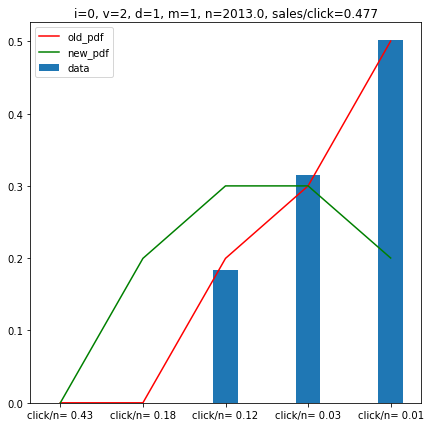

In [279]:
Tom.shift(-np.ones(16))
Tom.plot(9)

In [175]:
Tom.opt()

(401.5741363339514,
 array([-3.1918912e-16,  1.0000000e+00, -5.5000000e-01,  1.0000000e+00,
         2.5000000e-01,  9.0000000e-01,  1.0000000e+00,  1.0000000e+00,
         1.5000000e-01,  4.0000000e-01,  6.0000000e-01,  1.0000000e+00,
         6.0000000e-01,  1.0000000e+00,  1.0000000e+00,  1.0000000e+00]))

In [44]:
Tom.shift( np.array([-3.1918912e-16,  1.0000000e+00, -5.5000000e-01,  1.0000000e+00,
         2.5000000e-01,  9.0000000e-01,  1.0000000e+00,  1.0000000e+00,
         1.5000000e-01,  4.0000000e-01,  6.0000000e-01,  1.0000000e+00,
         6.0000000e-01,  1.0000000e+00,  1.0000000e+00,  1.0000000e+00]))

(8435.367020468606, 403.90426304711866, 0.04788223939361927)

In [75]:
1/0.04788223939361927

20.884570409905656

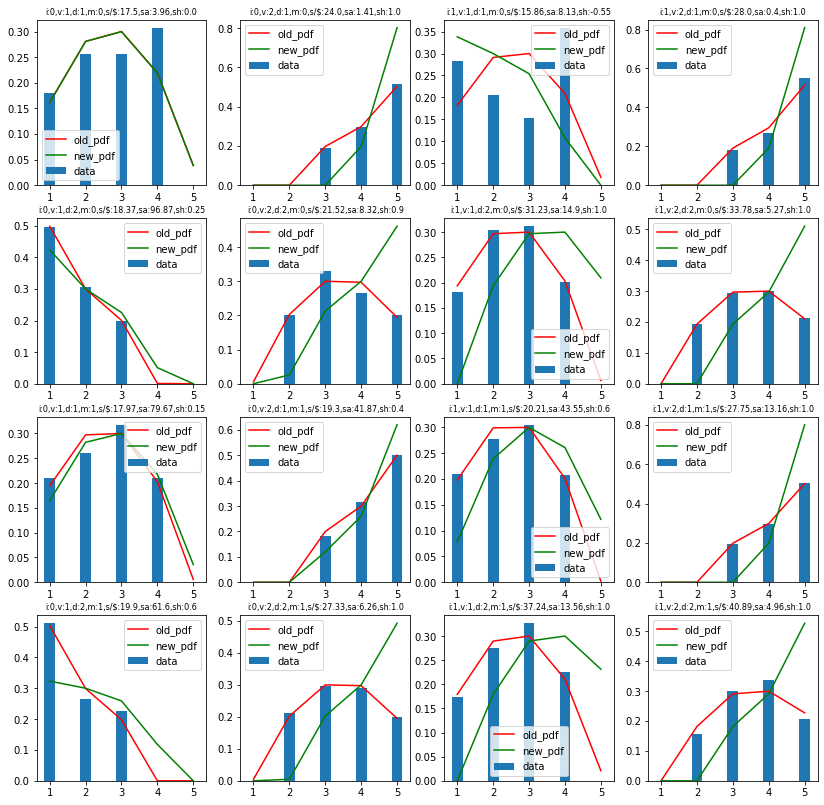

In [46]:
Tom.plot_all()

In [83]:
Pred_by_rank=np.array([[[2.93286219e-01, 5.13250883e-01, 5.71428571e-01, 7.00000000e+00,
         3.90000000e+01],
        [2.93286219e-01, 5.13250883e-01, 5.71428571e-01, 1.00000000e+01,
         3.90000000e+01],
        [2.93286219e-01, 5.13250883e-01, 5.71428571e-01, 1.00000000e+01,
         3.90000000e+01],
        [2.93286219e-01, 5.13250883e-01, 5.71428571e-01, 1.20000000e+01,
         3.90000000e+01],
        [2.93286219e-01, 5.13250883e-01, 5.71428571e-01, 0.00000000e+00,
         3.90000000e+01]],

       [[1.71083628e-01, 5.13250883e-01, 3.33333333e-01, 0.00000000e+00,
         1.11000000e+02],
        [1.71083628e-01, 5.13250883e-01, 3.33333333e-01, 0.00000000e+00,
         1.11000000e+02],
        [1.71083628e-01, 5.13250883e-01, 3.33333333e-01, 2.10000000e+01,
         1.11000000e+02],
        [1.71083628e-01, 5.13250883e-01, 3.33333333e-01, 3.30000000e+01,
         1.11000000e+02],
        [1.71083628e-01, 5.13250883e-01, 3.33333333e-01, 5.70000000e+01,
         1.11000000e+02]],

       [[3.59275618e-01, 5.13250883e-01, 7.00000000e-01, 1.10000000e+01,
         3.90000000e+01],
        [3.59275618e-01, 5.13250883e-01, 7.00000000e-01, 8.00000000e+00,
         3.90000000e+01],
        [3.59275618e-01, 5.13250883e-01, 7.00000000e-01, 6.00000000e+00,
         3.90000000e+01],
        [3.59275618e-01, 5.13250883e-01, 7.00000000e-01, 1.40000000e+01,
         3.90000000e+01],
        [3.59275618e-01, 5.13250883e-01, 7.00000000e-01, 0.00000000e+00,
         3.90000000e+01]],

       [[1.46643110e-01, 5.13250883e-01, 2.85714286e-01, 0.00000000e+00,
         9.30000000e+01],
        [1.46643110e-01, 5.13250883e-01, 2.85714286e-01, 0.00000000e+00,
         9.30000000e+01],
        [1.46643110e-01, 5.13250883e-01, 2.85714286e-01, 1.70000000e+01,
         9.30000000e+01],
        [1.46643110e-01, 5.13250883e-01, 2.85714286e-01, 2.50000000e+01,
         9.30000000e+01],
        [1.46643110e-01, 5.13250883e-01, 2.85714286e-01, 5.10000000e+01,
         9.30000000e+01]],

       [[2.65474595e-01, 5.13250883e-01, 5.17241379e-01, 2.82000000e+02,
         5.69000000e+02],
        [2.65474595e-01, 5.13250883e-01, 5.17241379e-01, 1.74000000e+02,
         5.69000000e+02],
        [2.65474595e-01, 5.13250883e-01, 5.17241379e-01, 1.13000000e+02,
         5.69000000e+02],
        [2.65474595e-01, 5.13250883e-01, 5.17241379e-01, 0.00000000e+00,
         5.69000000e+02],
        [2.65474595e-01, 5.13250883e-01, 5.17241379e-01, 0.00000000e+00,
         5.69000000e+02]],

       [[1.95524146e-01, 5.13250883e-01, 3.80952381e-01, 0.00000000e+00,
         4.84000000e+02],
        [1.95524146e-01, 5.13250883e-01, 3.80952381e-01, 9.70000000e+01,
         4.84000000e+02],
        [1.95524146e-01, 5.13250883e-01, 3.80952381e-01, 1.60000000e+02,
         4.84000000e+02],
        [1.95524146e-01, 5.13250883e-01, 3.80952381e-01, 1.29000000e+02,
         4.84000000e+02],
        [1.95524146e-01, 5.13250883e-01, 3.80952381e-01, 9.80000000e+01,
         4.84000000e+02]],

       [[1.31494028e-01, 5.13250883e-01, 2.56198347e-01, 1.07000000e+02,
         5.87000000e+02],
        [1.31494028e-01, 5.13250883e-01, 2.56198347e-01, 1.79000000e+02,
         5.87000000e+02],
        [1.31494028e-01, 5.13250883e-01, 2.56198347e-01, 1.83000000e+02,
         5.87000000e+02],
        [1.31494028e-01, 5.13250883e-01, 2.56198347e-01, 1.18000000e+02,
         5.87000000e+02],
        [1.31494028e-01, 5.13250883e-01, 2.56198347e-01, 0.00000000e+00,
         5.87000000e+02]],

       [[1.21559420e-01, 5.13250883e-01, 2.36842105e-01, 0.00000000e+00,
         4.51000000e+02],
        [1.21559420e-01, 5.13250883e-01, 2.36842105e-01, 8.70000000e+01,
         4.51000000e+02],
        [1.21559420e-01, 5.13250883e-01, 2.36842105e-01, 1.32000000e+02,
         4.51000000e+02],
        [1.21559420e-01, 5.13250883e-01, 2.36842105e-01, 1.36000000e+02,
         4.51000000e+02],
        [1.21559420e-01, 5.13250883e-01, 2.36842105e-01, 9.60000000e+01,
         4.51000000e+02]],

       [[2.77092501e-01, 5.13250883e-01, 5.39877301e-01, 1.57000000e+02,
         7.46000000e+02],
        [2.77092501e-01, 5.13250883e-01, 5.39877301e-01, 1.95000000e+02,
         7.46000000e+02],
        [2.77092501e-01, 5.13250883e-01, 5.39877301e-01, 2.37000000e+02,
         7.46000000e+02],
        [2.77092501e-01, 5.13250883e-01, 5.39877301e-01, 1.57000000e+02,
         7.46000000e+02],
        [2.77092501e-01, 5.13250883e-01, 5.39877301e-01, 0.00000000e+00,
         7.46000000e+02]],

       [[2.44633599e-01, 5.13250883e-01, 4.76635514e-01, 0.00000000e+00,
         2.01300000e+03],
        [2.44633599e-01, 5.13250883e-01, 4.76635514e-01, 0.00000000e+00,
         2.01300000e+03],
        [2.44633599e-01, 5.13250883e-01, 4.76635514e-01, 3.70000000e+02,
         2.01300000e+03],
        [2.44633599e-01, 5.13250883e-01, 4.76635514e-01, 6.34000000e+02,
         2.01300000e+03],
        [2.44633599e-01, 5.13250883e-01, 4.76635514e-01, 1.00900000e+03,
         2.01300000e+03]],

       [[2.23456167e-01, 5.13250883e-01, 4.35374150e-01, 1.54000000e+02,
         7.34000000e+02],
        [2.23456167e-01, 5.13250883e-01, 4.35374150e-01, 2.04000000e+02,
         7.34000000e+02],
        [2.23456167e-01, 5.13250883e-01, 4.35374150e-01, 2.24000000e+02,
         7.34000000e+02],
        [2.23456167e-01, 5.13250883e-01, 4.35374150e-01, 1.52000000e+02,
         7.34000000e+02],
        [2.23456167e-01, 5.13250883e-01, 4.35374150e-01, 0.00000000e+00,
         7.34000000e+02]],

       [[1.47964219e-01, 5.13250883e-01, 2.88288288e-01, 0.00000000e+00,
         2.05600000e+03],
        [1.47964219e-01, 5.13250883e-01, 2.88288288e-01, 0.00000000e+00,
         2.05600000e+03],
        [1.47964219e-01, 5.13250883e-01, 2.88288288e-01, 4.05000000e+02,
         2.05600000e+03],
        [1.47964219e-01, 5.13250883e-01, 2.88288288e-01, 6.08000000e+02,
         2.05600000e+03],
        [1.47964219e-01, 5.13250883e-01, 2.88288288e-01, 1.04300000e+03,
         2.05600000e+03]],

       [[2.26910917e-01, 5.13250883e-01, 4.42105263e-01, 3.11000000e+02,
         6.09000000e+02],
        [2.26910917e-01, 5.13250883e-01, 4.42105263e-01, 1.61000000e+02,
         6.09000000e+02],
        [2.26910917e-01, 5.13250883e-01, 4.42105263e-01, 1.37000000e+02,
         6.09000000e+02],
        [2.26910917e-01, 5.13250883e-01, 4.42105263e-01, 0.00000000e+00,
         6.09000000e+02],
        [2.26910917e-01, 5.13250883e-01, 4.42105263e-01, 0.00000000e+00,
         6.09000000e+02]],

       [[1.50219771e-01, 5.13250883e-01, 2.92682927e-01, 0.00000000e+00,
         4.37000000e+02],
        [1.50219771e-01, 5.13250883e-01, 2.92682927e-01, 9.30000000e+01,
         4.37000000e+02],
        [1.50219771e-01, 5.13250883e-01, 2.92682927e-01, 1.30000000e+02,
         4.37000000e+02],
        [1.50219771e-01, 5.13250883e-01, 2.92682927e-01, 1.27000000e+02,
         4.37000000e+02],
        [1.50219771e-01, 5.13250883e-01, 2.92682927e-01, 8.70000000e+01,
         4.37000000e+02]],

       [[1.10253893e-01, 5.13250883e-01, 2.14814815e-01, 1.03000000e+02,
         5.94000000e+02],
        [1.10253893e-01, 5.13250883e-01, 2.14814815e-01, 1.63000000e+02,
         5.94000000e+02],
        [1.10253893e-01, 5.13250883e-01, 2.14814815e-01, 1.94000000e+02,
         5.94000000e+02],
        [1.10253893e-01, 5.13250883e-01, 2.14814815e-01, 1.34000000e+02,
         5.94000000e+02],
        [1.10253893e-01, 5.13250883e-01, 2.14814815e-01, 0.00000000e+00,
         5.94000000e+02]],

       [[1.00418651e-01, 5.13250883e-01, 1.95652174e-01, 0.00000000e+00,
         4.38000000e+02],
        [1.00418651e-01, 5.13250883e-01, 1.95652174e-01, 6.90000000e+01,
         4.38000000e+02],
        [1.00418651e-01, 5.13250883e-01, 1.95652174e-01, 1.31000000e+02,
         4.38000000e+02],
        [1.00418651e-01, 5.13250883e-01, 1.95652174e-01, 1.48000000e+02,
         4.38000000e+02],
        [1.00418651e-01, 5.13250883e-01, 1.95652174e-01, 9.00000000e+01,
         4.38000000e+02]]])